In [1]:
'''
One-vs-One (OvO) классификации для 3 классов и "голосованием":
'''
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


# TODO START

In [5]:
# TODO Генерация выборки
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

# TODO Список пар классов
pairs = [(0, 1), (0, 2), (1, 2)]
models = {}

# 3. Обучение отдельных SVM для каждой пары
for a, b in pairs:
    idx = (y == a) | (y == b)
    X_pair = X[idx]
    y_pair = y[idx]
    clf = SVC(kernel='linear')
    clf.fit(X_pair, y_pair)
    models[(a, b)] = clf

# TODO "Голосование" для новых точек
def ovo_predict(X_test):
    votes = []
    for x in X_test:
        vote_counter = Counter()
        for (a, b), model in models.items():
            pred = model.predict([x])[0]
            vote_counter[pred] += 1
        # Побеждает класс с наибольшим количеством голосов
        final = vote_counter.most_common(1)[0][0]
        votes.append(final)
    return np.array(votes)

# TODO Пример: предсказания на всей обучающей выборке
y_pred = ovo_predict(X)

# Проверка точности
accuracy = (y_pred == y).mean()
print("Accuracy:", accuracy)

Accuracy: 0.93


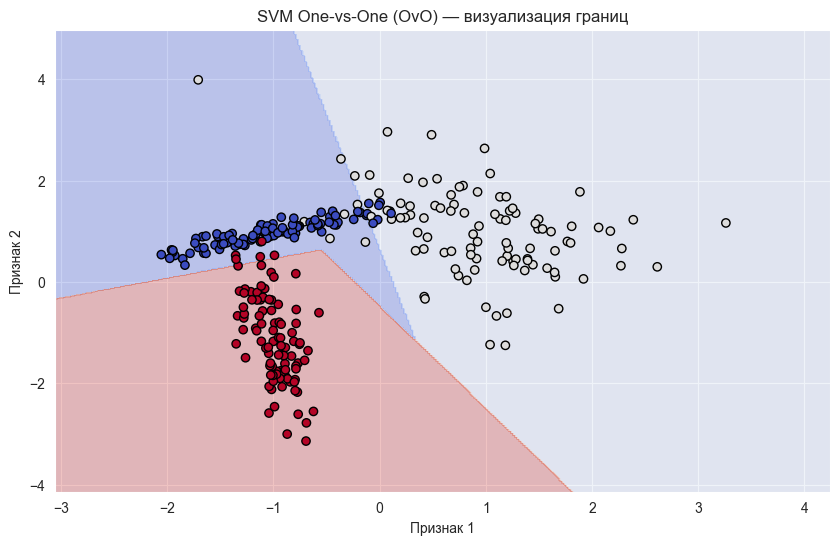

In [6]:
 # TODO Сетка координат для визуализации
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

 # TODO Прогнозы на всей сетке точек
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = ovo_predict(grid_points)
Z = Z.reshape(xx.shape)

 # TODO Визуализация
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM One-vs-One (OvO) — визуализация границ")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()